### Задача 2 
#### Оценка среднего значения и дисперсии для времени обработки запросов сервисом.
В файле ms_bucket.csv содержатся данные по распределению времени обработки запросов сервисом; необходимо:
1. Рассчитать среднее значение и дисперсию для времени обработки запросов сервисом в зависимости от календарного времени.
2. Отобразить среднее значение времени обработки запроса и дисперсию на графиках в зависимости от календарного времени.
#### Автор: Жарова Мария, zharova.ma@phystech.edu

In [3]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

### Предобработка файла

In [4]:
# Функция для преобразования колонки timestamp в стандартное время
def convert_time(time_t):
    return pd.to_datetime('01/01/1970') + datetime.timedelta(seconds=time_t)

In [5]:
data = pd.read_csv('./ms_bucket.csv')
data = data.dropna() # удалим пустые строки
data['timestamp'] = data['timestamp'].apply(convert_time) # преобразуем колонку timestamp
data = data.rename(columns={'timestamp': '0.001', 'Inf': '0.002'}) # для удобства переименовываем колонки
data.columns = data.columns.astype(float)
data = data.reindex(sorted(list(data.columns)), axis=1) # сортировка колонок по времени выполнения процессов
col_names = data.columns.tolist()
for num_col in range(len(col_names) - 1, 2, -1):  # вычитание из колонок с наибольшим временем колонок с наименьшим
    data[col_names[num_col]] -=  data[col_names[num_col-1]]
data

,0.001,0.002,1.000,2.000,3.000,4.000,5.000,10.000,20.000,30.000,...,30000.000,40000.000,50000.000,60000.000,70000.000,80000.000,90000.000,100000.000,110000.000,120000.000
0,2019-08-01 09:00:00,88967916.0,56905292.0,5719411.0,4739667.0,1292575.0,577277.0,3390672.0,9757800.0,3102469.0,...,11.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-08-01 09:05:00,88989154.0,56919502.0,5720076.0,4741412.0,1293154.0,577426.0,3391311.0,9759436.0,3103135.0,...,11.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-08-01 09:10:00,89004769.0,56930005.0,5720732.0,4742359.0,1293510.0,577566.0,3391812.0,9760807.0,3103633.0,...,11.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-08-01 09:15:00,89020289.0,56940760.0,5721240.0,4743507.0,1293878.0,577644.0,3392263.0,9762006.0,3104078.0,...,11.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-08-01 09:20:00,89026526.0,56942467.0,5721831.0,4744800.0,1294252.0,577739.0,3392580.0,9762897.0,3104457.0,...,11.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,2019-08-10 08:40:00,166307173.0,103228905.0,11623814.0,9669704.0,2755713.0,1181131.0,6421584.0,18413607.0,5987875.0,...,16.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2589,2019-08-10 08:45:00,166317268.0,103232285.0,11625337.0,9671693.0,2756229.0,1181233.0,6421983.0,18415043.0,5988264.0,...,16.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2590,2019-08-10 08:50:00,166329003.0,103236181.0,11626591.0,9674990.0,2756792.0,1181325.0,6422402.0,18416476.0,5988654.0,...,16.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2591,2019-08-10 08:55:00,166343782.0,103242723.0,11628355.0,9677742.0,2757390.0,1181468.0,6422904.0,18418100.0,5989077.0,...,16.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Небольшая проверка данных

In [ ]:
# Ничего не видно в колонках со временем выполнения 6ольше 6000
a = np.where(data[50000] != 0, False, True)
for i in a:
    if i != True:
        print('!!!')
# Запустим - и правда, там везде нули, ничего не вывелось

In [9]:
# Для интереса проверим, что данные корректны (сумма всех процессов из inf == подсчитанному числу по соответствующей строке)
for i in range(len(data)):
    if sum(data.loc[i][1:].tolist()) != data.loc[i][0.002]:
        print('False!')
# Тоже верно

### Решение самой задачи

In [6]:
''' Вспомогательная функция для вычисления дисперсии
    напишем специально для нашего датасета, col_names считаем глобальной переменной
    Input: строка датафрейма (row = data.loc[i], for i in range(len(data)))
    Output: значение дисперсии для соответствующей строки '''
def my_var(row, mean_row):
    summ = 0
    for j in range(2, len(col_names)):
        summ += row[col_names[j]] * ((col_names[j] - mean_row) ** 2)
    return summ / row[0.002]

In [7]:
# Массивы средних значений и дисперсий по строкам
means = [sum(np.multiply(data.loc[i][1:].tolist(), col_names[2:])) / data.loc[i][0.002] for i in range(len(data))]
var = [my_var(data.loc[i], means[i]) for i in range(len(data))]

In [8]:
# Можно сохранить полученные результаты в датафрейм и csv-файл
df = pd.DataFrame({'time': data[0.001], 'mean': means, 'var': var})
df.to_csv('output.csv')

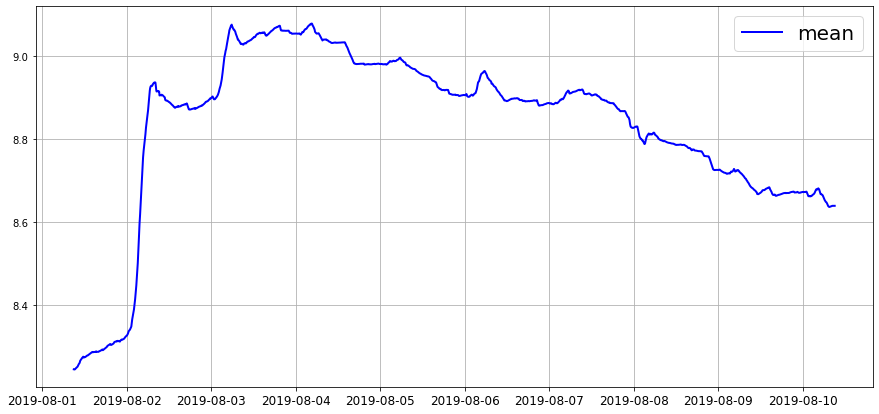

In [20]:
plt.figure(figsize=(15, 7))
plt.plot(data[0.001], means, color='blue', linewidth=2, label='mean')
plt.legend(loc='upper right', prop={'size':20})
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
plt.grid(True)
plt.show()

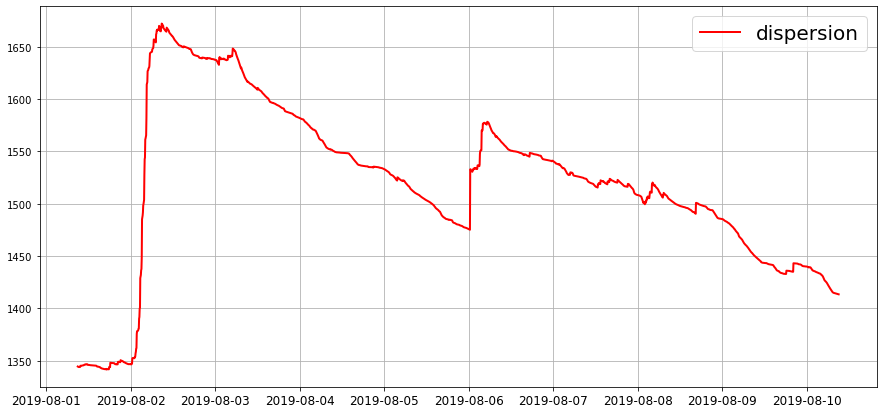

In [22]:
plt.figure(figsize=(15, 7))
plt.plot(data[0.001], var, color='red', linewidth=2, label='dispersion')
plt.legend(loc='upper right', prop={'size':20})
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
plt.grid(True)
plt.show()